In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r"C:\Users\loq\OneDrive\Desktop\python\python project\healthcare\archive (3).zip")

In [28]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,34.55,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,29.30,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Checking Missing Values

In [17]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Displaying Rows With Missing Values

In [18]:
df.loc[df.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


## Handling Missing Values (BMI)

In [22]:
df['bmi'].interpolate(method='linear',inplace=True)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Data Cleaning & Formatting

convert age into integer

In [25]:
df['age']=df['age'].astype(int)

Remove “Other” gender rows (very small sample)

In [29]:
df=df[df['gender']!="other"]

## Feature Engineering

Create age groups

In [30]:
df['age_group']=pd.cut(
    df['age'],
    bins=[0,25,40,60,120],
    labels=['youth','adult','middle aged','senior']
)

Create BMI categories

In [32]:
df['bmi_category']=pd.cut(
    df['bmi'],
    bins=[0,18.5,25,30,60],
    labels=['underweight','normal','overweight','obese']
)

## Exploratory Data Analysis (EDA)

Stroke Distribution

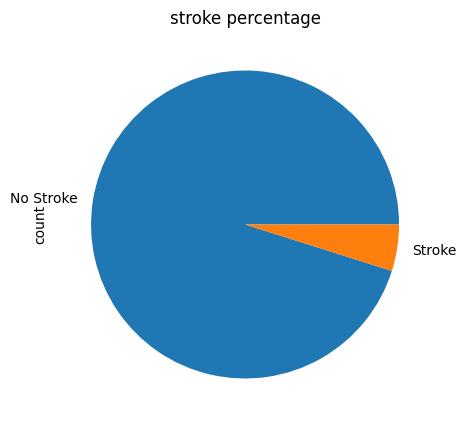

In [35]:
plt.figure(figsize=(6,5))
df['stroke'].value_counts().plot(kind='pie',labels=['No Stroke','Stroke'])
plt.title("stroke percentage")
plt.show()

Gender Distribution

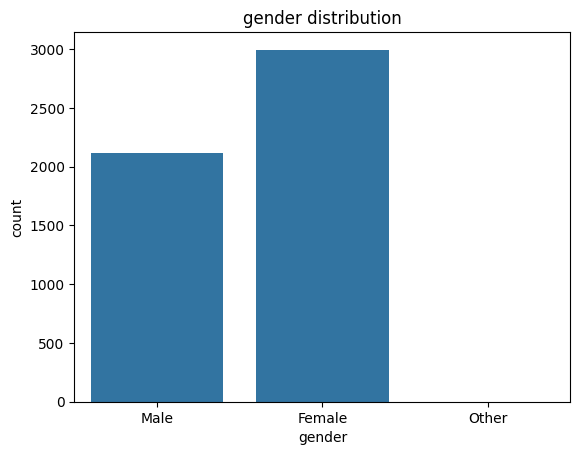

In [38]:
sns.countplot(x='gender',data=df)
plt.title("gender distribution")
plt.show()

Stroke by Gender

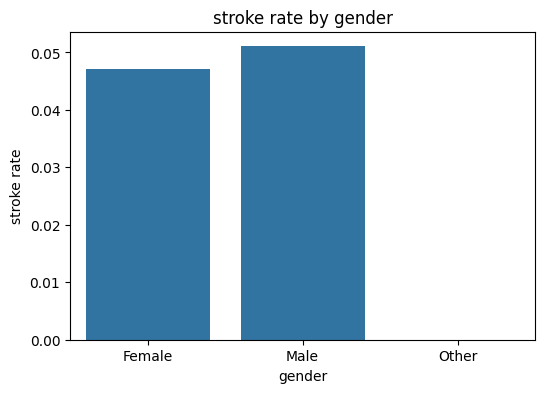

In [56]:
stroke_gender=df.groupby('gender')['stroke'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=stroke_gender.index,y=stroke_gender.values)
plt.title("stroke rate by gender")
plt.ylabel("stroke rate")
plt.show()

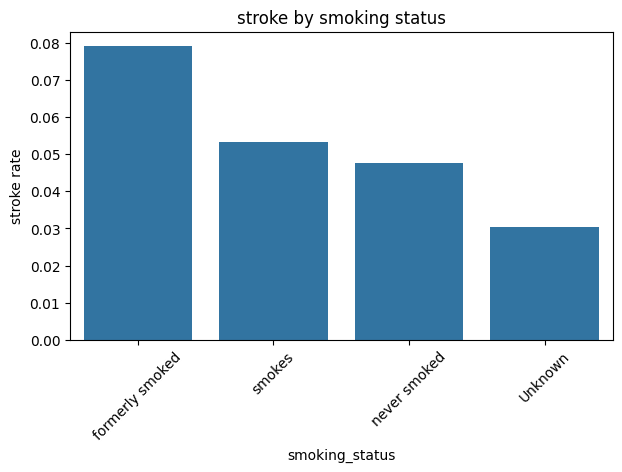

In [54]:
stroke_smoking=df.groupby('smoking_status')['stroke'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=stroke_smoking.index,y=stroke_smoking.values)
plt.title("stroke by smoking status")
plt.ylabel("stroke rate")
plt.xticks(rotation=45)
plt.show()

Glucose Levels by Stroke Condition

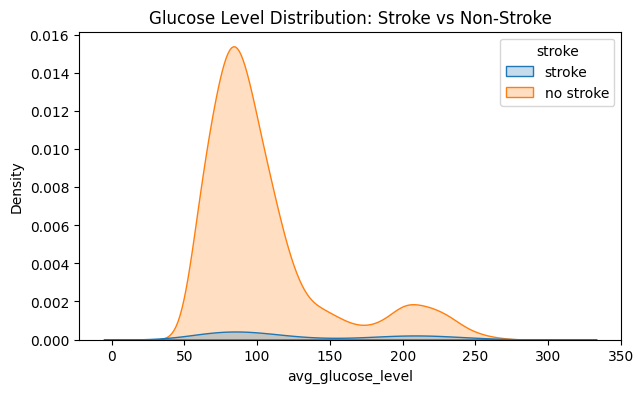

In [64]:
plt.figure(figsize=(7,4))
sns.kdeplot(data=df, x="avg_glucose_level", hue=df["stroke"].map({0:"no stroke",1:"stroke"}),fill=True)
plt.title("Glucose Level Distribution: Stroke vs Non-Stroke")
plt.show()


BMI Distribution by Stroke

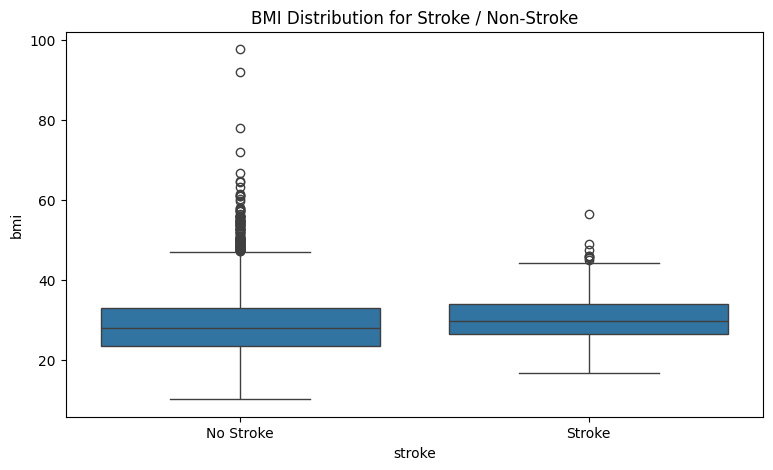

In [72]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df, x="stroke", y="bmi")
plt.title("BMI Distribution for Stroke / Non-Stroke")
plt.xticks([0,1],['No Stroke','Stroke'])
plt.show()


## Groupby Analysis (Sales project equivalent)

Stroke rate by age group

In [77]:
age_stroke=df.groupby('age_group')['stroke'].mean()
age_stroke

C:\Users\loq\AppData\Local\Temp\ipykernel_23368\969897597.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stroke=df.groupby('age_group')['stroke'].mean()


age_group
youth          0.001600
adult          0.006309
middle aged    0.040973
senior         0.135736
Name: stroke, dtype: float64

Stroke by Work Type

In [79]:
work_stroke=df.groupby('work_type')['stroke'].mean().sort_values(ascending=True)
work_stroke

work_type
Never_worked     0.000000
children         0.002911
Govt_job         0.050228
Private          0.050940
Self-employed    0.079365
Name: stroke, dtype: float64

## Top-Risk Patients

Top 5 highest glucose values

In [84]:
df.nlargest(5, 'avg_glucose_level')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category
193,69112,Male,68,1,1,Yes,Private,Rural,271.74,31.1,smokes,1,senior,obese
1207,22440,Female,49,0,0,Yes,Private,Urban,267.76,29.3,formerly smoked,0,middle aged,overweight
3088,26267,Female,76,0,0,Yes,Self-employed,Urban,267.61,27.9,smokes,0,senior,overweight
4983,10995,Male,76,1,0,Yes,Private,Rural,267.60,30.5,never smoked,0,senior,obese
2462,27626,Female,60,0,0,No,Govt_job,Rural,266.59,25.5,never smoked,0,middle aged,overweight


Top 5 oldest patients

In [83]:
df.nlargest(5, 'age')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category
23,64778,Male,82,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1,senior,obese
32,39373,Female,82,1,0,Yes,Self-employed,Urban,196.92,22.2,never smoked,1,senior,normal
35,712,Female,82,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1,senior,overweight
42,61960,Male,82,0,1,Yes,Private,Urban,144.90,26.4,smokes,1,senior,overweight
56,38829,Female,82,0,0,Yes,Private,Rural,59.32,33.2,never smoked,1,senior,obese


In [86]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,senior,obese
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,34.55,never smoked,1,senior,obese
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,senior,obese
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,middle aged,obese
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,senior,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,29.30,never smoked,0,senior,overweight
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0,senior,obese
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0,adult,obese
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0,middle aged,overweight
